<a href="https://colab.research.google.com/github/shruti-miku/IS_project/blob/master/IS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_excel('C:\\Users\\Md Shafaq Alli\\Downloads\\ML PROJECT\\Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
data.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [ ]:
data.shape 

(5000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:


data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:


for column in data.columns:
    print(f' Unique values in {column} is {len(data[column].unique())}')

 Unique values in ID is 5000
 Unique values in Age is 45
 Unique values in Experience is 47
 Unique values in Income is 162
 Unique values in ZIP Code is 467
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


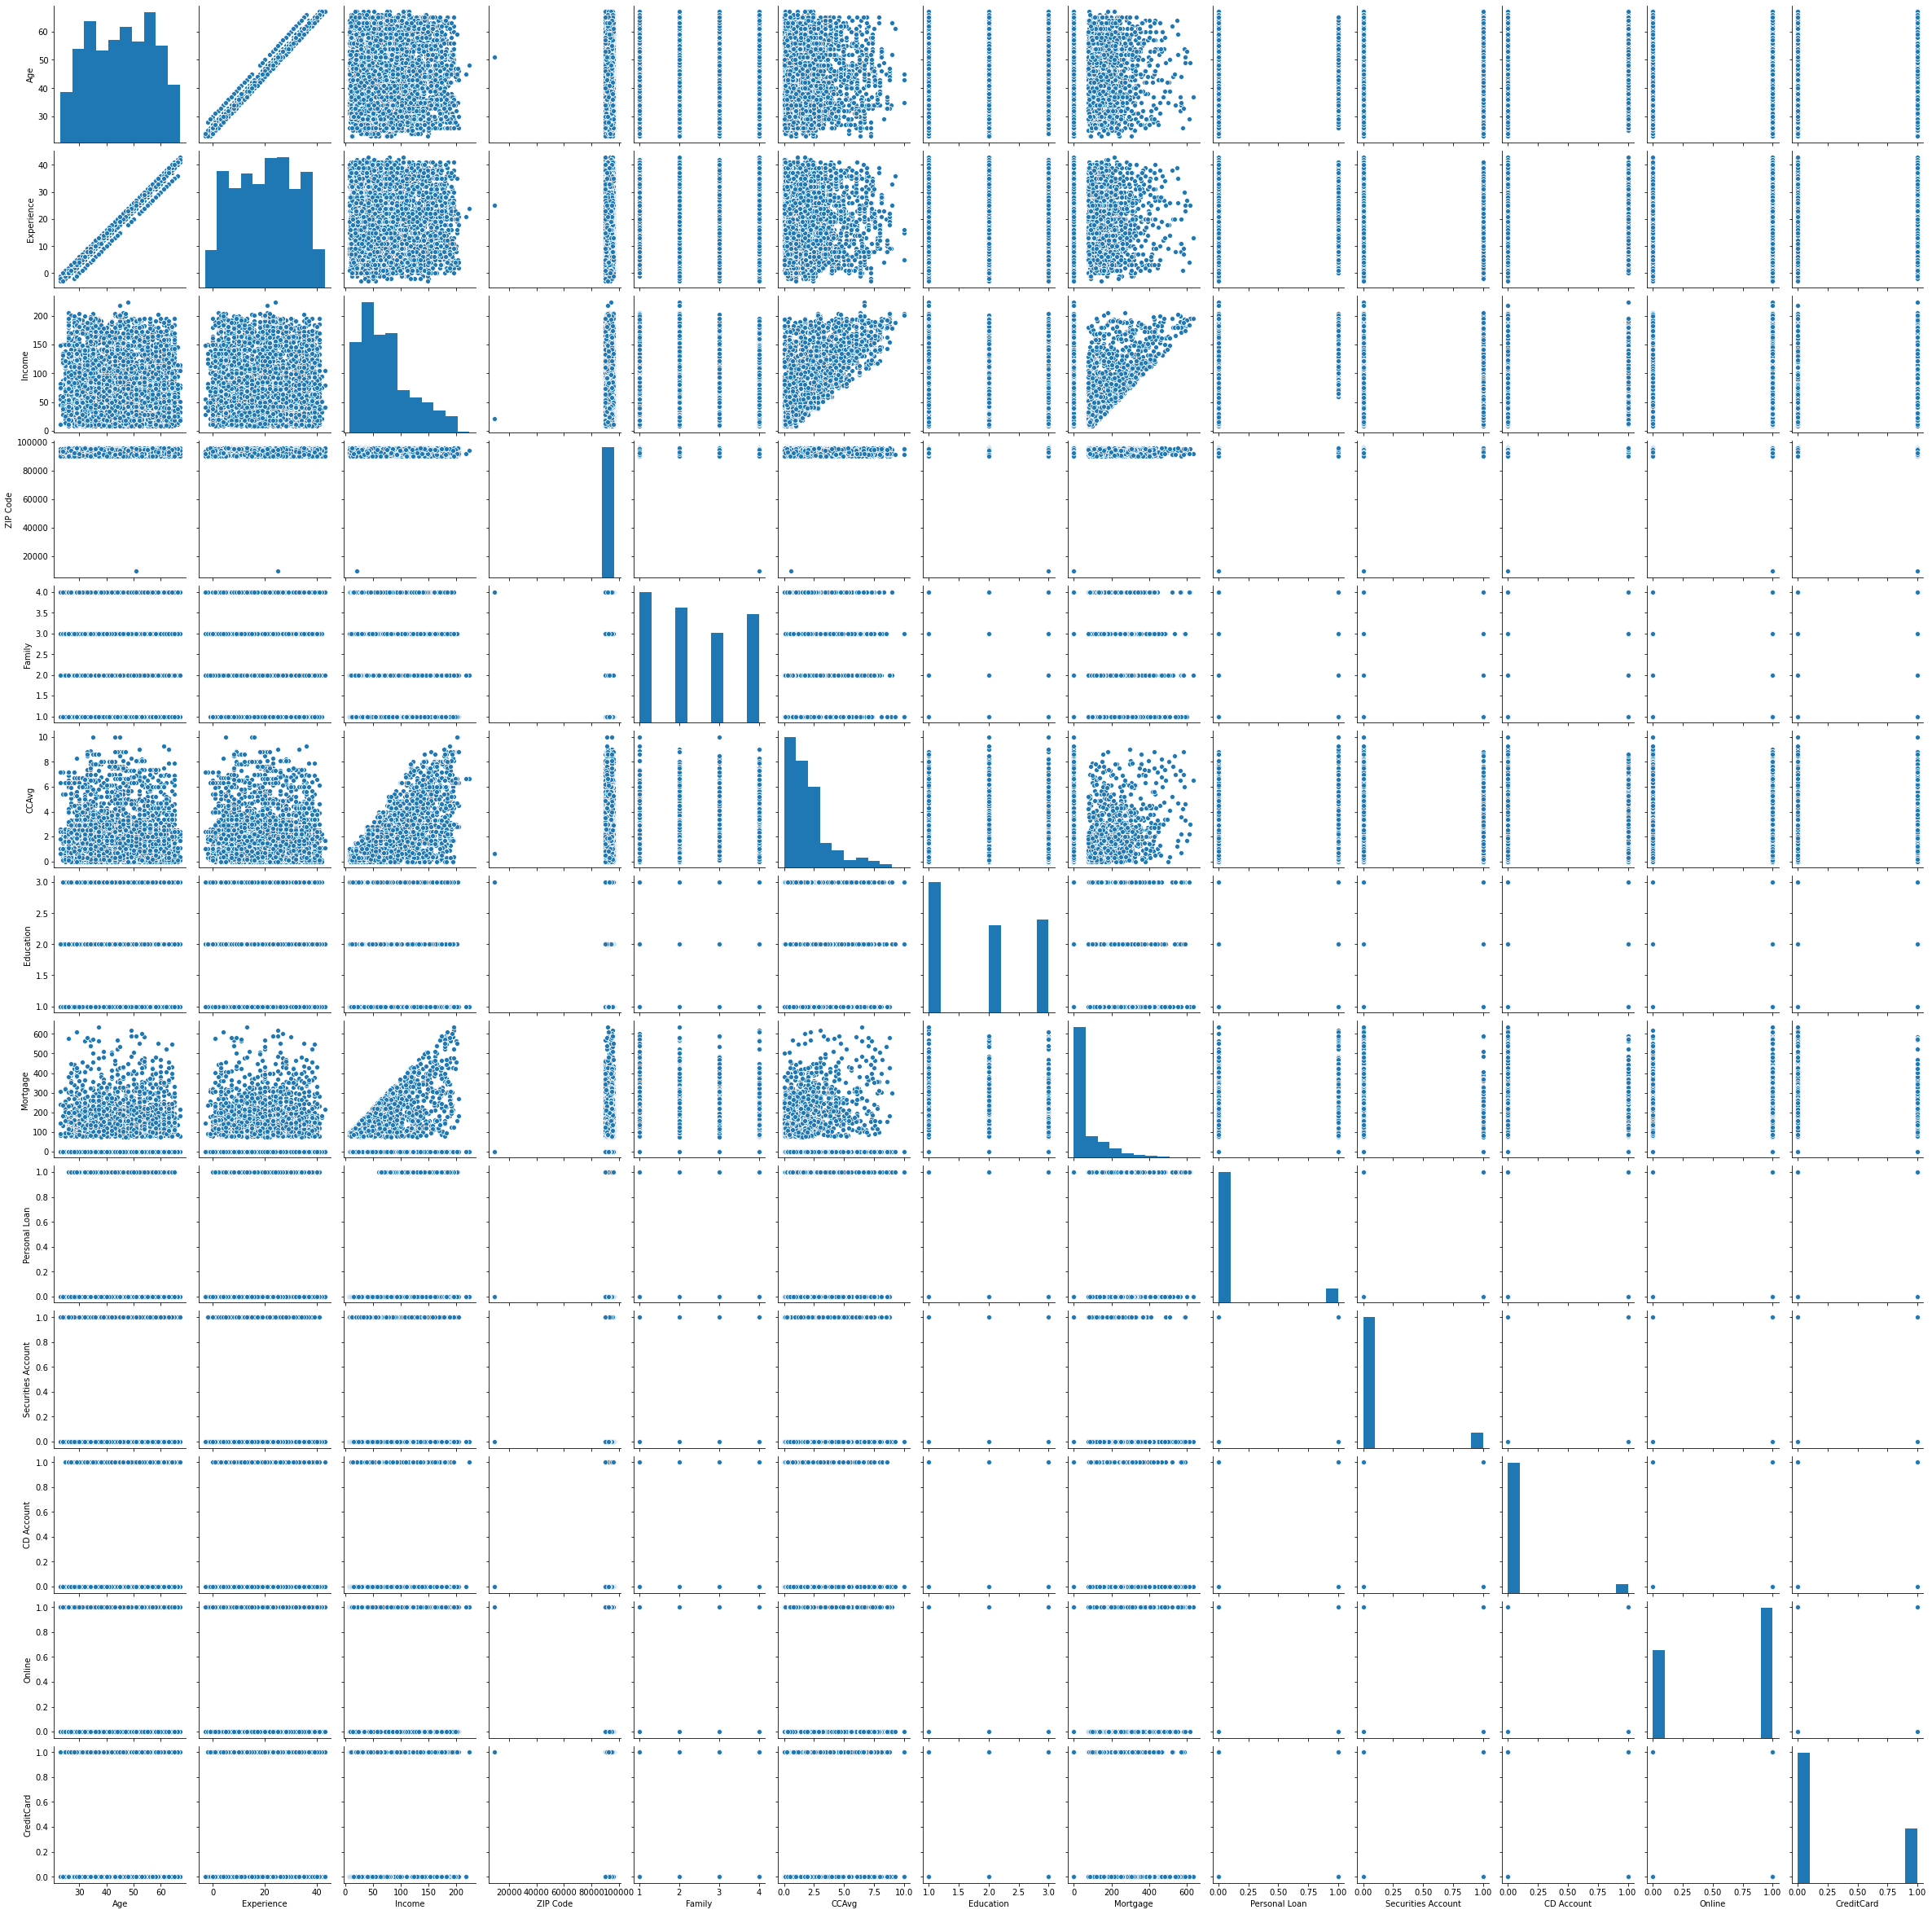

In [ ]:


sns.pairplot(data.iloc[:,1:])

In [ ]:



print('Number of people with zero mortgage:',len(data[data['Mortgage']==0]))

Number of people with zero mortgage: 3462


In [ ]:
## people with zero cc spending per month

print('Number of people with zero Credit Card spending per month:', len(data[data['CCAvg']==0]))

Number of people with zero Credit Card spending per month: 106


In [ ]:
data['CCAvg'].value_counts()

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64

In [ ]:



categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(data[column].value_counts())
    print()

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64



**Univariate Analysis**


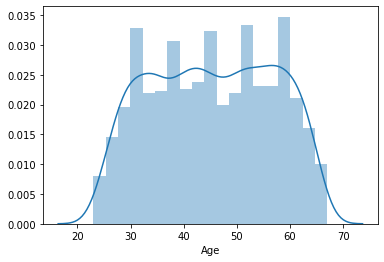

In [ ]:
sns.distplot(data.Age)
##Age has a symmetric distribution.

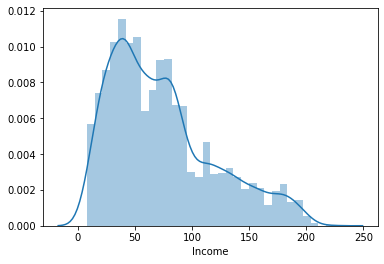

In [ ]:
sns.distplot(data.Income)
##Income has a right skewed distribution

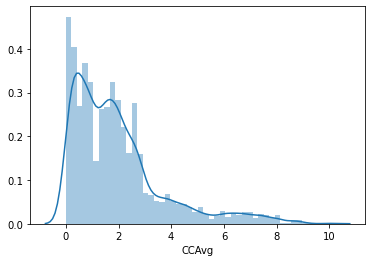

In [ ]:
sns.distplot(data.CCAvg)


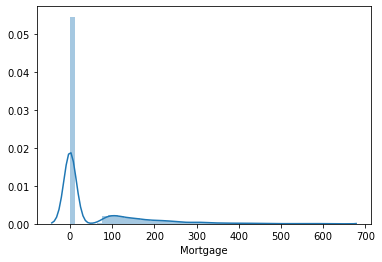

In [ ]:
sns.distplot(data.Mortgage)


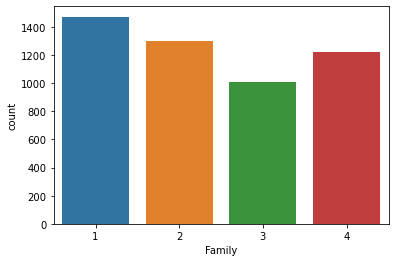

In [ ]:
sns.countplot(data.Family)

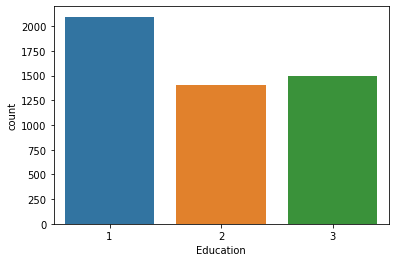

In [ ]:
sns.countplot(data.Education)

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

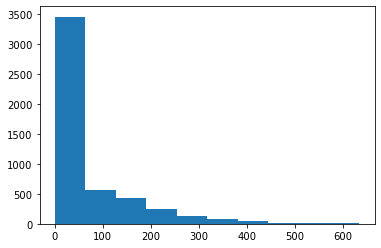

In [ ]:
plt.hist(data['Mortgage'])

**Multivariate Analysis**

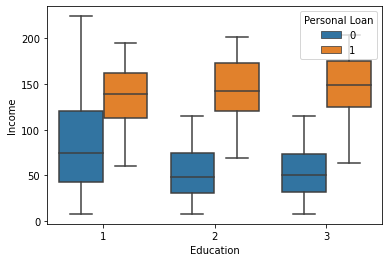

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)


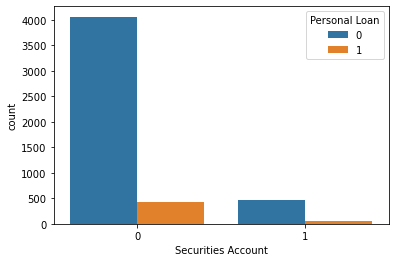

In [ ]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")


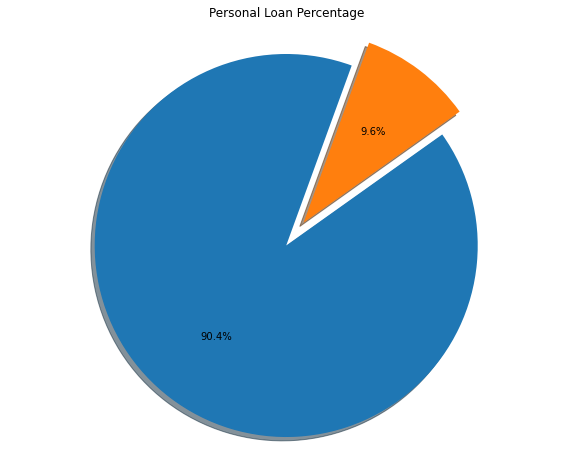

In [ ]:
DF=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

##9.6% get approved for personal loans.

In [ ]:
corr = data.corr()


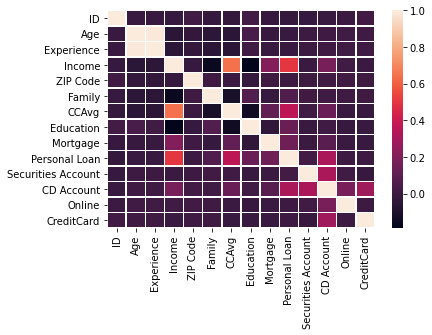

In [ ]:
sns.heatmap(corr, linewidths=0.5)

In [ ]:
data.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)  ##we drop the ID and ZIP Code columns because they are irrelevent and Experience because it is highly correleted to Age

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [ ]:
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan'].values

X.shape, y.shape

((5000, 10), (5000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [ ]:
class_names = ['wont take loan', 'take loan']

#### LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.86
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

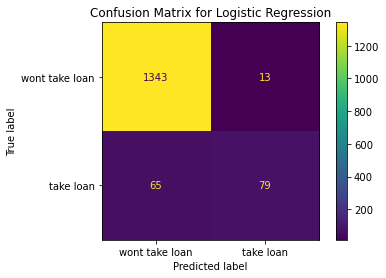

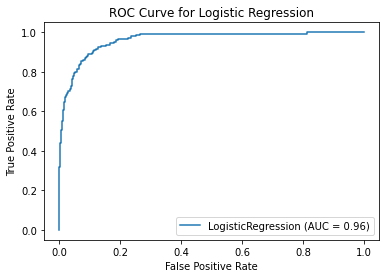

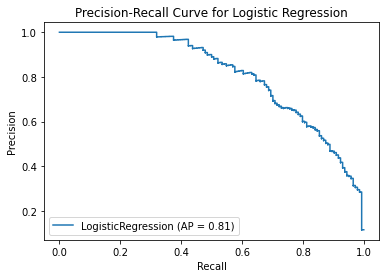

In [ ]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

#### RANDOM FOREST CLASSIFIER

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, n_jobs=-1)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.95
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

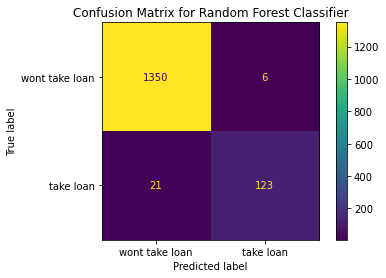

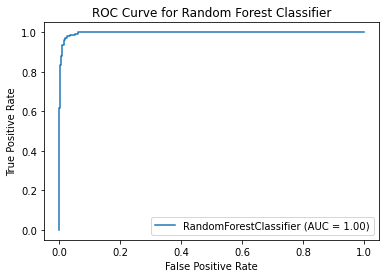

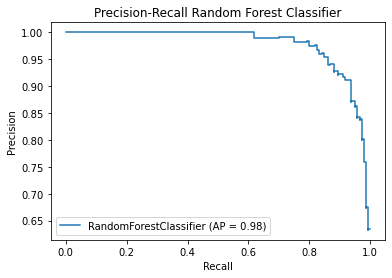

In [ ]:
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

In [ ]:
## we get the best result from the random forest classifier.